**In this project 28x28 dimensional images belononging to the MNIST sign language dataset have been classified into 26 classes, with 27,455 training images and 7172 test images.**

In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is taken from [link text](https://): https://www.kaggle.com/datamunge/sign-language-mnist/home.

Please find the CSV files CSV files: sign_mnist_test.csv and sign_mnist_train.csv in the zip folder, and upload them here to test the working of the model. 


In [ ]:
uploaded=files.upload()


Saving sign_mnist_test.csv to sign_mnist_test (2).csv
Saving sign_mnist_train.csv to sign_mnist_train (2).csv


In [ ]:
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        images = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            images.append(img)
            labels.append(label)

        images = np.array(images).astype(float)
        labels = np.array(labels).astype(float)
            
    return images, labels


train_imgs, train_labels = get_data('sign_mnist_train.csv')
test_imgs, test_labels = get_data('sign_mnist_test.csv')


print(train_imgs.shape)
print(train_labels.shape)
print(test_imgs.shape)
print(test_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [ ]:
# Adding another dimension to the data, so that the data can be fed into the CNN conv2D layer
# So, for example, if the array dimension is (10000, 28, 28)
# we make it (10000, 28, 28, 1)

train_imgs = np.expand_dims(train_imgs, axis=3)
test_imgs = np.expand_dims(test_imgs, axis=3)

# Creating an ImageDataGenerator and doing Image Augmentation
train_datagen = ImageDataGenerator(
    rescale= 1./ 255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator( rescale= 1./ 255)
    

print(train_imgs.shape)
print(test_imgs.shape)
    

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
# Defining the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compiling Model. 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Configuring the generators
train_gen = train_datagen.flow( train_imgs, train_labels, batch_size=64)

val_gen = validation_datagen.flow( test_imgs, test_labels, batch_size=64)


# Training the Model
history = model.fit_generator(train_gen, epochs=30, validation_data=val_gen)

    


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
429/429 [==============================] - 9s 20ms/step - loss: 3.0212 - accuracy: 0.0971 - val_loss: 2.0548 - val_accuracy: 0.3380
Epoch 2/30
429/429 [==============================] - 8s 20ms/step - loss: 2.1797 - accuracy: 0.3176 - val_loss: 1.3836 - val_accuracy: 0.5283
Epoch 3/30
429/429 [==============================] - 8s 19ms/step - loss: 1.7709 - accuracy: 0.4331 - val_loss: 1.2724 - val_accuracy: 0.5676
Epoch 4/30
429/429 [==============================] - 8s 19ms/step - loss: 1.5131 - accuracy: 0.5133 - val_loss: 0.9014 - val_accuracy: 0.6881
Epoch 5/30
429/429 [==============================] - 8s 19ms/step - loss: 1.2685 - accuracy: 0.5875 - val_loss: 0.8924 - val_accuracy: 0.6959
Epoch 6/30
429/429 [==============================] - 8s 20ms/step - loss: 1.1197 - accuracy: 0.6348 - val_loss: 0.7598 - val_accuracy: 0.7354
Epoch 7/30
429/429 [==============================] - 8s 19ms/step - loss: 0.9993 - accuracy: 0.6725 - val_loss: 0.6324 - val_accuracy: 0.7726

[6.92426086682151, 0.56609035]

In [ ]:
model.evaluate(test_imgs/255, test_labels)

225/225 [==============================] - 1s 2ms/step - loss: 0.1364 - accuracy: 0.9501


[0.13636314868927002, 0.9500836730003357]

**Thus we can see that the classifier has an accuracy of around 95% on the test set**

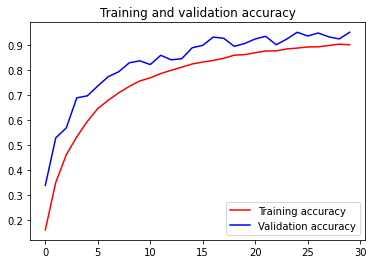

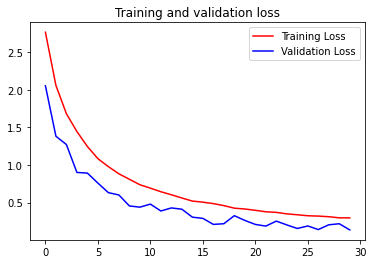

In [ ]:
# Plotting charts for accuracy and loss on training and validation

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
